In [1]:
import cfGPR

import numpy as np
import matplotlib.pyplot as plt

In [2]:
theta = {
    'var_s': 1,
    'sigma_x': 0.063,
    'sigma_y': 0.316,
    'phi': 0
}

In [45]:
GP = cfGPR.CurlFreeGPR()

In [46]:
# GP.load_fits('folio2')
# sample = {'u1': -1, 'u2': 0, 'v1': 0, 'v2': 1}
# GP.extract_data(450, sample=None)

In [47]:
GP.gen_synthetic_data(5000, theta)

In [48]:
GP.sigma_clip()

In [49]:
GP.split_data()
print(GP.nData)

5000


In [50]:
%%time
GP.fit(theta)

CPU times: user 40.7 s, sys: 2.48 s, total: 43.1 s
Wall time: 3.6 s


In [51]:
%%time
GP.predict()

CPU times: user 1min 18s, sys: 4.08 s, total: 1min 22s
Wall time: 6.84 s


have a function to fit the 2d correlation of the observed data to a 2d gaussian (amplitude, sigma_x, sigma_y, phi). get the general formula for a 2d rotated gaussian and fit it with least squares? See 360 homework for possible help.

to do this I first need to find the 2d correlation function of the entire dataset (not just the training set, right?), fit it and find the 4 parameters. The function should return the 4 parameters and that will be the initial guess for the scipy optimizer.

Really probably should be using xiE instead of xiplus, but use xiplus for now and talk to Gary about this on Tuesday.

RMSx, RMSy, noise: 324.36889519304543 59.759789493599335 0.8366672463687168


/home/fortino/DESworkspace/cfGPR.py:584: RuntimeWarning: invalid value encountered in true_divide
  sumxw = np.where( sumw > minWeight, sumxw / sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:585: RuntimeWarning: invalid value encountered in true_divide
  sumyw = np.where( sumw > minWeight, sumyw / sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:586: RuntimeWarning: divide by zero encountered in true_divide
  sumw = np.where( sumw > minWeight, 1./sumw, noData)
/home/fortino/DESworkspace/cfGPR.py:587: RuntimeWarning: invalid value encountered in greater
  rmsx = np.std(sumxw[sumw>0.])
/home/fortino/DESworkspace/cfGPR.py:588: RuntimeWarning: invalid value encountered in greater
  rmsy = np.std(sumyw[sumw>0.])
/home/fortino/DESworkspace/cfGPR.py:589: RuntimeWarning: invalid value encountered in greater
  print('RMSx, RMSy, noise:', rmsx, rmsy, np.sqrt(np.mean(sumw[sumw>0.])))
/home/fortino/DESworkspace/cfGPR.py:597: RuntimeWarning: invalid value encountered in less
  useful = np.logic

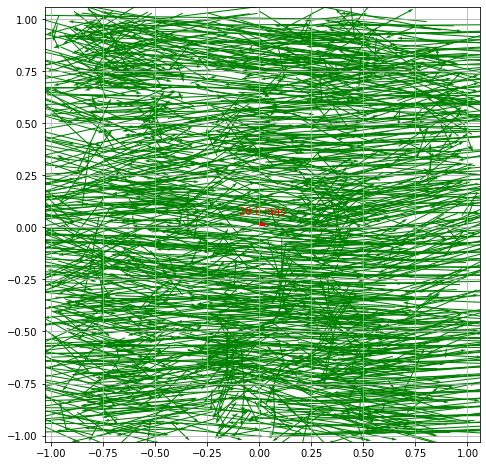

In [52]:
GP.plot_residuals(GP.Xtest, GP.Ytest, GP.Etest)

RMSx, RMSy, noise: 0.9263329817410145 0.7940714557957024 0.8366672463687168


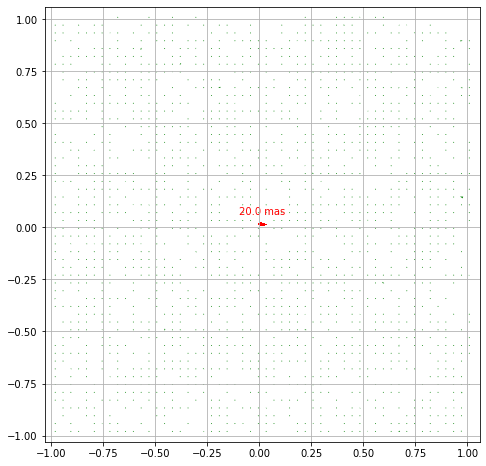

In [53]:
GP.plot_residuals(GP.Xtest, GP.Ytest - GP.fbar_s, GP.Etest)

RMSx, RMSy, noise: 320.5483169017326 59.033491540048345 0.4609236546824717


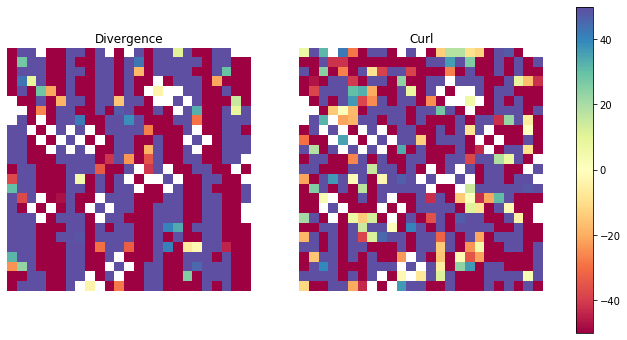

RMS of div: 533.18; curl: 226.36


In [54]:
GP.plot_div_curl(GP.Xtest, GP.Ytest, GP.Etest)

RMSx, RMSy, noise: 0.5822427718193841 0.473227153080331 0.4609236546824717


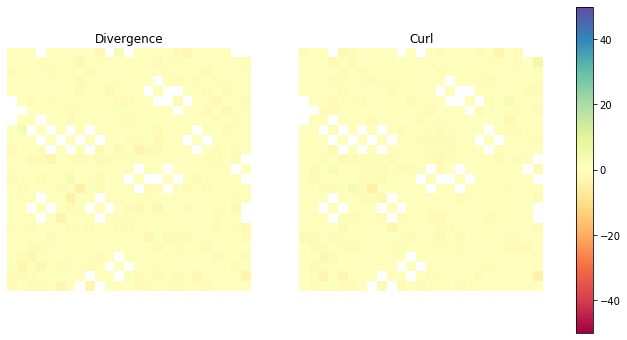

RMS of div: 0.90; curl: 0.84


In [55]:
GP.plot_div_curl(GP.Xtest, GP.Ytest - GP.fbar_s, GP.Etest)

Length  2500


/home/fortino/DESworkspace/cfGPR.py:430: RuntimeWarning: invalid value encountered in true_divide
  logr = np.histogram(logdr, bins=bins, range=hrange, weights=logdr)[0] / counts
/home/fortino/DESworkspace/cfGPR.py:435: RuntimeWarning: invalid value encountered in true_divide
  xiplus = np.histogram(logdr, bins=bins, range=hrange, weights=vvec)[0]/counts
/home/fortino/DESworkspace/cfGPR.py:437: RuntimeWarning: invalid value encountered in true_divide
  xiz2 = np.histogram(logdr, bins=bins, range=hrange, weights=vvec)[0]/counts


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


/home/fortino/DESworkspace/cfGPR.py:446: RuntimeWarning: invalid value encountered in true_divide
  ximinus = np.histogram(logdr, bins=bins, range=hrange, weights=vvec)[0]/counts


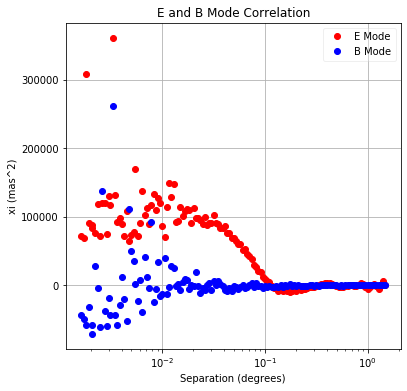

In [56]:
GP.plot_Emode_2ptcorr(GP.Xtest, GP.Ytest, Bmode=True)

Length  2500
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


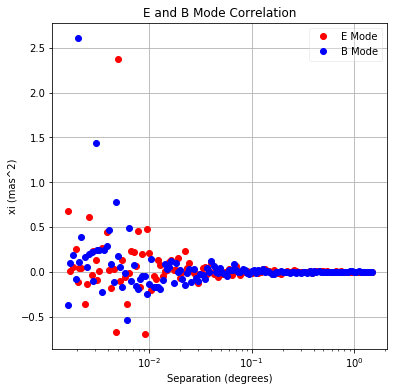

In [57]:
GP.plot_Emode_2ptcorr(GP.Xtest, GP.Ytest - GP.fbar_s, Bmode=True)